[adaptado de [Programa de cursos integrados Aprendizado de máquina](https://www.coursera.org/specializations/machine-learning-introduction) de [Andrew Ng](https://www.coursera.org/instructor/andrewng)  ([Stanford University](http://online.stanford.edu/), [DeepLearning.AI](https://www.deeplearning.ai/) ) ]

In [ ]:
# Baixar arquivos adicionais para o laboratório.
!wget https://github.com/fabiobento/dnn-course-2024-1/raw/main/00_course_folder/ml_intro/class_03/9%20-%20Atividade%20Avaliativa%20-%20Regress%C3%A3o%20Log%C3%ADstica/lab_utils_ml_intro_assig_week_3.zip
!unzip -n -q lab_utils_ml_intro_assig_week_3.zip

In [2]:
# Testar se estamos no Google Colab
try:
  import google.colab
  IN_COLAB = True
  from google.colab import output
  output.enable_custom_widget_manager()
except:
  IN_COLAB = False

In [3]:
!pip install ipympl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


# Regressão Logística

Neste exercício, você implementará a regressão logística e a aplicará a dois conjuntos de dados diferentes.


# Tópicos
- [ 1 - Pacotes ](#1)
- [ 2 - Regressão Logística](#2)
  - [ 2.1 Definição do Problema](#2.1)
  - [ 2.2 Carregando e visualizando os dados](#2.2)
  - [ 2.3  Função Sigmoid](#2.3)
  - [ 2.4 Função de custo para regressão logística](#2.4)
  - [ 2.5 Gradiente para regressão logística](#2.5)
  - [ 2.6 Parâmetros de aprendizagem usando gradiente descendente ](#2.6)
  - [ 2.7 Plotando a fronteira de decisão](#2.7)
  - [ 2.8 Avaliando a regressão logística](#2.8)
- [ 3 - Regressão Lógística Regularizada](#3)
  - [ 3.1 Definição do Problema](#3.1)
  - [ 3.2 Carregando e Visualizando os Dados](#3.2)
  - [ 3.3 Mapeamento de Características](#3.3)
  - [ 3.4 Função de custo para regressão logística regularizada](#3.4)
  - [ 3.5 Gradiente para regressão logística regularizada](#3.5)
  - [ 3.6 Parâmetros de aprendizagem usando gradiente descendente](#3.6)
  - [ 3.7 Plotando a fronteira de decisão](#3.7)
  - [ 3.8 Avaliando modelo de regressão logística regularizado](#3.8)


<a name="1"></a>
## 1 - Pacotes 

Primeiro, vamos executar a célula abaixo para importar todos os pacotes que você precisará durante esta tarefa.
- [numpy](www.numpy.org) é o pacote fundamental para computação científica com Python.
- [matplotlib](http://matplotlib.org) é uma biblioteca famosa para plotar gráficos em Python.
- ``utils.py`` contém funções auxiliares para esta tarefa. Você não precisa modificar o código neste arquivo.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

<a name="2"></a>
## 2 - Regressão Logística

Nesta parte do exercício, você construirá um modelo de regressão logística para prever se um aluno será admitido em uma universidade.

<a name="2.1"></a>
### 2.1 Definição do problema

Suponha que você seja o administrador de um departamento universitário e queira determinar a chance de admissão de cada candidato com base nos resultados de dois exames.
* Você tem dados históricos de candidatos anteriores que podem ser usados como conjunto de treinamento para regressão logística.
* Para cada exemplo de treinamento, você tem as notas do candidato em dois exames e a decisão de admissão.
* Sua tarefa é construir um modelo de classificação que estime a probabilidade de admissão de um candidato com base nas notas desses dois exames.

<a name="2.2"></a>
### 2.2 Carregando e visualizando os dados

Você começará carregando o conjunto de dados para esta tarefa.
- A função `load_dataset()` mostrada abaixo carrega os dados nas variáveis `X_train` e `y_train`
   - `X_train` contém notas de exames em dois exames para um aluno
   - `y_train` é a decisão de admissão
       - `y_train = 1` se o aluno foi admitido
       - `y_train = 0` se o aluno não foi admitido
   - Tanto `X_train` quanto `y_train` são arrays numpy.

In [5]:
# carregar o conjunto de dados
X_train, y_train = load_data("data/ex2data1.txt")

#### Veja as variáveis
Vamos nos familiarizar mais com seu conjunto de dados.
- Um bom lugar para começar é simplesmente imprimir cada variável e ver o que ela contém.

O código abaixo imprime os primeiros cinco valores de `X_train` e o tipo da variável.

In [6]:
print("Os primeiros cinco elementos em X_train são:\n", X_train[:5])
print("Tipo de X_train:",type(X_train))

Os primeiros cinco elementos em X_train são:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Tipo de X_train: <class 'numpy.ndarray'>


Agora imprima os primeiros cinco valores de `y_train`

In [8]:
print("Os primeiros cinco elementos em y_train são:\n", y_train[:5])
print("Tipo de y_train:",type(y_train))

Os primeiros cinco elementos em y_train são:
 [0. 0. 0. 1. 1.]
Tipo de y_train: <class 'numpy.ndarray'>


#### Verifique as dimensões de suas variáveis

Outra forma útil de se familiarizar com seus dados é visualizar suas dimensões. Vamos imprimir a forma de `X_train` e `y_train` e ver quantos exemplos de treinamento temos em nosso conjunto de dados.

In [9]:
print('A forma do X_train é: ' + str(X_train.shape))
print('A forma de y_train é: ' + str(y_train.shape))
print('Temos m = %d exemplos de treinamento' % (len(y_train)))

A forma do X_train é: (100, 2)
A forma de y_train é: (100,)
Temos m = 100 exemplos de treinamento


#### Visualize seus dados

Antes de começar a implementar qualquer algoritmo de aprendizagem, é sempre bom visualizar os dados, se possível.
- O código abaixo exibe os dados em um gráfico 2D (conforme mostrado abaixo), onde os eixos são as notas dos dois exames e os exemplos positivos e negativos são mostrados com marcadores diferentes.
- Usamos uma função auxiliar no arquivo ``utils.py`` para gerar este gráfico.

<img src="images/figure 1.png" width="450" height="450">



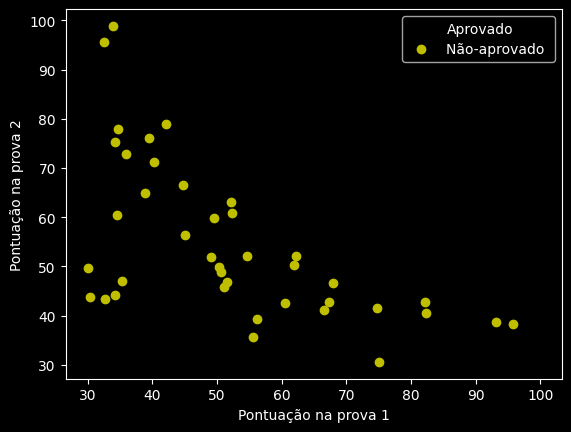

In [12]:
# Plotar os exmplos
plot_data(X_train, y_train[:], pos_label="Aprovado", neg_label="Não-aprovado ")

# Definir o rótulo do eixo y
plt.ylabel('Pontuação na prova 2') 
# Definir o rótulo do eixo x
plt.xlabel('Pontuação na prova 1') 
plt.legend(loc="upper right")
plt.show()

Seu objetivo é construir um modelo de regressão logística que se ajuste a esses dados.
- Com este modelo, você pode prever se um novo aluno será admitido com base nas notas dos dois exames.

<a name="2.3"></a>
### 2.3 Função sigmóide

Lembre-se que para regressão logística, o modelo é representado como

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
onde a função $g$ é a função sigmóide. A função sigmóide é definida como:

$$g(z) = \frac{1}{1+e^{-z}}$$

Vamos implementar a função sigmóide primeiro, para que ela possa ser usada no restante desta tarefa.

<a name='ex-01'></a>
### Exercício 1
Complete a função `sigmoid` para calcular

$$g(z) = \frac{1}{1+e^{-z}}$$

Observe que
- `z` nem sempre é um número único, mas também pode ser uma matriz de números.
- Se a entrada for uma matriz de números, gostaríamos de aplicar a função sigmóide a cada valor da matriz de entrada.

Se tiver dúvidas, você pode conferir as dicas apresentadas após a célula abaixo para ajudá-lo na implementação.

In [ ]:
# UNQ_C1
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Calcular o sigmoide de z

    Args:
        z (ndarray): vetor numérica de qualquer tamanho.

    Retorns:
        g (ndarray): sigmoid(z), com a mesma forma de z
         
    """
          
    ### INICIE SEU CÓDIGO AQUI ### 
    
    ### TERMINE SEU CÓDIGO AQUI ### 
    
    return g

<details>
  <summary><font size="3" color="darkgreen"><b>Clique para dicas</b></font></summary>
       
   * O `numpy` tem uma função chamada [`np.exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), que oferece uma maneira conveniente de calcular o exponencial ( $e^{z}$) de todos os elementos da matriz de entrada (`z`).

 
<details>
          <summary><font size="2" color="darkblue"><b> Clique para ainda mais dicas</b></font></summary>
        
  - Você pode traduzir $e^{-z}$ em código como `np.exp(-z)` 
    
  - Você pode traduzir $1/e^{-z}$ em código como `1/np.exp(-z)` 
    
    Se você ainda estiver com dificuldades, pode verificar as dicas apresentadas abaixo para descobrir como calcular `g` 
    
    <details>
          <summary><font size="2" color="darkblue"><b>Dica para calcular g</b></font></summary>
        <code>g = 1 / (1 + np.exp(-z))</code>
    </details>


</details>

Quando terminar, tente testar alguns valores chamando `sigmoid(x)` na célula abaixo. 
- Para valores positivos grandes de x, o sigmoide deve estar próximo de 1, enquanto para valores negativos grandes, o sigmoide deve estar próximo de 0. 
- A avaliação de `sigmoid(0)` deve lhe dar exatamente 0,5. 


In [ ]:
# Observação: você pode editar esse valor
value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")

**Saída Esperada**:
<table>
  <tr>
    <td> <b>sigmoid(0)<b></td>
    <td> 0.5 </td> 
  </tr>
</table>
    
- Como mencionado anteriormente, seu código também deve funcionar com vetores e matrizes. Para uma matriz, sua função deve executar a função sigmoide em cada elemento.

In [ ]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

# TESTE DA UNIDADE
from public_tests import *
sigmoid_test(sigmoid)

**Saída Esperada**:
<table>
  <tr>
    <td><b>sigmoid([-1, 0, 1, 2])<b></td> 
    <td>[0.26894142        0.5           0.73105858        0.88079708]</td> 
  </tr>    
  
</table>

<a name="2.4"></a>
### 2.4 Função de custo para regressão logística

Nesta seção, você implementará a função de custo para regressão logística.

<a name='ex-02'></a>
### Exercício 2

Complete a função `compute_cost` usando as equações abaixo.

Lembre-se de que, para a regressão logística, a função de custo tem a forma 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

onde
* m é o número de exemplos de treinamento no conjunto de dados


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ é o custo de um único ponto de dados, que é - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ é a previsão do modelo, enquanto $y^{(i)}$, que é o rótulo real

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ m que a função $g$ é a função sigmoide.
    * Pode ser útil calcular primeiro uma variável intermediária $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ onde $n$ é o número de recursos, antes de calcular $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

Observação:
* Enquanto estiver fazendo isso, lembre-se de que as variáveis `X_train` e `y_train` não são valores escalares, mas matrizes de forma ($m, n$) e ($𝑚$,1), respectivamente, em que $𝑛$ é o número de recursos e $𝑚$ é o número de exemplos de treinamento.
* Você pode usar a função sigmoide que implementou acima para essa parte.

Se tiver dúvidas, consulte as dicas apresentadas após a célula abaixo para ajudá-lo na implementação.

In [ ]:

def compute_cost(X, y, w, b, *argv):
    """
    Calcula o custo de todos os exemplos
    Args:
      X : (ndarray Shape (m,n)) dados, m examples by n features
      y : (ndarray Shape (m,))  valor alvo
      w : (ndarray Shape (n,))  valores dos parâmetros do modelo      
      b : (scalar)              valores dos parâmetros do modelo      
      *argv : não utilizado, para compatibilidade com a versão regularizada abaixo
    Returns:
      total_cost : (escalar) custo 
    """

    m, n = X.shape
    
    ### INICIE SEU CÓDIGO AQUI ### 



    
    
    ### TERMINE SEU CÓDIGO AQUI ###

    return total_cost

<details>
  <summary><font size="3" color="darkgreen"><b>Clique para Dicas</b></font></summary>
    
    * Você pode representar um operador de soma, por exemplo: $h = \sum\limits_{i = 0}^{m-1} 2i$ no código da seguinte forma:   
    ```python 
        h = 0
        for i in range(m):
            h = h + 2*i
    ```
   * Em seguida, você pode retornar o `total_cost` como `loss_sum` dividido por `m`.
   * Se você for novato em Python, verifique se o código está devidamente recuado com espaços ou tabulações consistentes. Caso contrário, ele poderá produzir uma saída diferente ou gerar um erro `IndentationError: unexpected indent`. Para obter detalhes, consulte [esse tópico](https://community.deeplearning.ai/t/indentation-in-python-indentationerror-unexpected-indent/159398) no fórum de DeepLearning.AI.
     
   <details>
    <summary><font size="2" color="darkblue"><b> Clique para mai Dicas</b></font></summary>
        
    * Veja como você pode estruturar a implementação geral dessa função
        
    ```python 
    def compute_cost(X, y, w, b, *argv):
        m, n = X.shape
    
        ### INICIE SEU CÓDIGO AQUI ###
        loss_sum = 0 
        
        # Fazer um loop em cada exemplo de treinamento
        for i in range(m): 
            
            # Primeiro calcule z_wb = w[0]*X[i][0]+...+w[n-1]*X[i][n-1]+b
            z_wb = 0 
            # Fazer um loop em cada recurso
            for j in range(n): 
                # Adicione o termo correspondente a z_wb
                z_wb_ij = # Seu código para calcular w[j] * X[i][j]
                z_wb += z_wb_ij # equivalente a z_wb = z_wb + z_wb_ij
            # Adicione o termo de polarização a z_wb
            z_wb += b #equivalente a z_wb = z_wb + b
        
            f_wb = # Seu código aqui para calcular a previsão f_wb para um exemplo de treinamento
            loss =  # Seu código aqui para calcular a perda para um exemplo de treinamento
            
            loss_sum += loss # equivalent to loss_sum = loss_sum + loss
        
        total_cost = (1 / m) * loss_sum  
        ### TERMINE SEU CÓDIGO AQUI ### 
        
        return total_cost
    ```
       Se ainda estiver com dúvidas, você pode consultar as dicas apresentadas abaixo para descobrir como calcular `z_wb_ij`, `f_wb` e `cost`.
    <details>
          <summary><font size="2" color="darkblue"><b>Dica pra calcular z_wb_ij</b></font></summary>
           &emsp; &emsp; <code>z_wb_ij = w[j]*X[i][j] </code>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Dica pra calcular f_wb</b></font></summary>
           &emsp; &emsp; $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$ onde $g$ é a função sigmoid. Você pode simplesmente chamar a função `sigmoid` implementada acima.
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; Mais dicas para calcular f</b></font></summary>
               &emsp; &emsp; Você pode calcular f_wb como <code>f_wb = sigmoid(z_wb) </code>
           </details>
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Dica para calcular a perda</b></font></summary>
          &emsp; &emsp; Você pode usar função <a href="https://numpy.org/doc/stable/reference/generated/numpy.log.html">np.log</a> para calcular o log
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; Mais dicas para calcular a perda</b></font></summary>
              &emsp; &emsp; Você pode calcular a perda com <code>loss =  -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)</code>
          </details>
    </details>
        
    </details>

</details>

Execute as células abaixo para verificar sua implementação da função `compute_cost` com duas inicializações diferentes dos parâmetros $w$ e $b$

In [ ]:
m, n = X_train.shape

# Calcular e exibir o custo com w e b inicializados como zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Custo em w e b iniciais (zeros): {:.3f}'.format(cost))

**Saída Esperada**:
<table>
  <tr>
    <td> <b>Custo inicial w e b (zeros)<b></td>
    <td> 0.693 </td> 
  </tr>
</table>

In [ ]:
# Calcular e exibir o custo com w e b diferentes de zero
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Custo de w e b (não-zeros) no conjunto de teste: {:.3f}'.format(cost))


# TESTE DA UNIDADE
compute_cost_test(compute_cost)

**Saída Esperada**:
<table>
  <tr>
    <td> <b>Custo de w e b (não-zeros) no conjunto de teste:<b></td>
    <td> 0.218 </td> 
  </tr>
</table>

<a name="2.5"></a>
### 2.5 Gradiente para regressão logística

Nesta seção, você implementará o gradiente para a regressão logística.

Lembre-se de que o algoritmo de descida de gradiente é:

$$\begin{align*}& \text{repita até a convergência:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{para j := 0..n-1}\newline & \rbrace\end{align*}$$

onde os parâmetros $b$, $w_j$ são atualizados simultaneamente


<a name='ex-03'></a>
### Exercício 3

Complete a função `compute_gradient` para calcular $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ das equações (2) e (3) abaixo.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m é o número de exemplos de treinamento no conjunto de dados

    
*  $f_{\mathbf{w},b}(x^{(i)})$ é a predição do modelo, enquanto $y^{(i)}$ é o rótulo verdadeiro


**Nota**: Embora esse gradiente pareça idêntico ao gradiente da regressão linear, a fórmula é, na verdade, diferente porque a regressão linear e a regressão logística têm definições diferentes de $f_{\mathbf{w},b}(x)$.

Como antes, você pode usar a função sigmoide que implementou acima e, se tiver dúvidas, pode consultar as dicas apresentadas após a célula abaixo para ajudá-lo com a implementação.

In [ ]:
def compute_gradient(X, y, w, b, *argv): 
    """
    Calcula o gradiente para regressão logística 
 
    Args:
      X : (ndarray Shape (m,n)) dados, m exemplos n características
      y : (ndarray Shape (m,))  valor alvo
      w : (ndarray Shape (n,))  valores dos parâmetros do modelo
      b : (scalar)              valores dos parâmetros do modelo
      *argv : não utilizado, para compatibilidade com a versão regularizada abaixo
    Returns
      dj_dw : (ndarray Shape (n,)) O gradiente do custo em relação aos parâmetros w. 
      dj_db : (scalar)             O gradiente do custo em relação aos parâmetros b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### INICIE SEU CÓDIGO AQUI ### 
    for i in range(m):
        z_wb = None
        for j in range(n): 
            z_wb += None
        z_wb += None
        f_wb = None
        
        dj_db_i = None
        dj_db += None
        
        for j in range(n):
            dj_dw[j] = None
            
    dj_dw = None
    dj_db = None
    ### TERMINE SEU CÓDIGO AQUI ### 

        
    return dj_db, dj_dw

 <details>
  <summary><font size="3" color="darkgreen"><b>Clique para Dicas</b></font></summary>
    
    
* Veja como você pode estruturar a implementação geral dessa função
    ```python 
       def compute_gradient(X, y, w, b, *argv): 
            m, n = X.shape
            dj_dw = np.zeros(w.shape)
            dj_db = 0.
        
            ### INICIE SEU CÓDIGO AQUI ### 
            for i in range(m):
                # Calcule f_wb (exatamente como você fez na função compute_cost acima)
                f_wb = 
        
                # Calcule o gradiente para b a partir deste exemplo
                dj_db_i = # Seu código aqui para calcular o erro
        
                # some a dj_db
                dj_db += dj_db_i
        
                # obter dj_dw para cada atributo
                for j in range(n):
                    # Você codifica aqui para calcular o gradiente do i-ésimo exemplo para o j-ésimo atributo
                    dj_dw_ij =  
                    dj_dw[j] += dj_dw_ij
        
            # dividir dj_db e dj_dw pelo número total de exemplos
            dj_dw = dj_dw / m
            dj_db = dj_db / m
            ### TERMINE SEU CÓDIGO AQUI ### 
       
            return dj_db, dj_dw
    ```
   * Se você for novato em Python, verifique se o código está devidamente recuado com espaços ou tabulações consistentes. Caso contrário, ele poderá produzir uma saída diferente ou gerar um erro `IndentationError: unexpected indent`. Para obter detalhes, consulte [esse tópico](https://community.deeplearning.ai/t/indentation-in-python-indentationerror-unexpected-indent/159398) no fórum de DeepLearning.AI.


    * Se ainda tiver dúvidas, você pode consultar as dicas apresentadas abaixo para descobrir como calcular `f_wb`, `dj_db_i` e `dj_dw_ij` 
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; Lembre-se de que você calculou f_wb em <code>compute_cost</code> acima - para obter dicas detalhadas sobre como calcular cada termo intermediário, consulte a seção de dicas abaixo desse exercício
           <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; Mais dicas pra calcular f_wb</b></font></summary>
              &emsp; &emsp; Você pode calcular f_wb com
               <pre>
               for i in range(m):   
                   # Calcule f_wb (exatamente como você fez na função compute_cost acima)
                   z_wb = 0
                   # Fazer um loop em cada recurso
                   for j in range(n): 
                       # Adicione o termo correspondente a z_wb
                       z_wb_ij = X[i, j] * w[j]
                       z_wb += z_wb_ij
            
                   # Adicionar termo de viés 
                   z_wb += b
        
                   # Calcular a previsão do modelo
                   f_wb = sigmoid(z_wb)
    </details>
        
    </details>
    <details>
          <summary><font size="2" color="darkblue"><b>Dica para calcular dj_db_i</b></font></summary>
           &emsp; &emsp; Você pode calcular dj_db_i como <code>dj_db_i = f_wb - y[i]</code>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Dica pra calcular dj_dw_ij</b></font></summary>
        &emsp; &emsp; Você pode calcular dj_dw_ij como <code>dj_dw_ij = (f_wb - y[i])* X[i][j]</code>
    </details>

</details>

Execute as células abaixo para verificar sua implementação da função `compute_gradient` com duas inicializações diferentes dos parâmetros $w$ e $b$

In [ ]:
# Calcular e exibir o gradiente com w e b inicializados como zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db em w and b (zeros) iniciais:{dj_db}' )
print(f'dj_dw e, w and b (zeros) iniciais:{dj_dw.tolist()}' )

**Saída Esperada**:
<table>
  <tr>
    <td> <b>dj_db em w and b (zeros) iniciais:<b></td>
    <td> -0.1 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw e, w and b (zeros) iniciais:<b></td>
    <td> [-12.00921658929115, -11.262842205513591] </td> 
  </tr>
</table>

In [ ]:
# Calcular e exibir o custo e o gradiente com w e b diferentes de zero
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db em w and b de teste:', dj_db)
print('dj_dw em w and b de teste:', dj_dw.tolist())

# TESTE DA UNDADE    
compute_gradient_test(compute_gradient)

**Saída Esperada**:
<table>
  <tr>
    <td> <b>dj_db em w and b de teste:<b></td>
    <td> -0.5999999999991071 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw em w and b de teste:<b></td>
    <td>  [-44.8313536178737957, -44.37384124953978] </td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 Parâmetros de aprendizagem usando a descida de gradiente 

Da mesma forma que na tarefa anterior, agora você encontrará os parâmetros ideais de um modelo de regressão logística usando a descida gradiente. 
- Você não precisa implementar nada para esta parte. Basta executar as células abaixo. 

- Uma boa maneira de verificar se a descida de gradiente está funcionando corretamente é observar
o valor de $J(\mathbf{w},b)$ e verificar se ele está diminuindo a cada etapa. 

- Supondo que você tenha implementado o gradiente e calculado o custo corretamente, o valor de $J(\mathbf{w},b)$ nunca deve aumentar e deve convergir para um valor estável no final do algoritmo.

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Executa a descida do gradiente em lote para aprender theta. Atualiza theta tomando 
    num_iters etapas de gradiente com taxa de aprendizado alfa
    
    Args:
      X :    (ndarray Shape (m, n) dados, m exemplos n características
      y :    (ndarray Shape (m,))  valor alvo
      w_in : (ndarray Shape (n,))  valores dos parâmetros do modelo
      b_in : (scalar)              valores dos parâmetros do modelo
      cost_function :              função para calcular custo
      gradient_function :          função para calcular o gradiente
      alpha : (float)              taxa de aprendizado
      num_iters : (int)            número de iterações para executar a descida do gradiente
      lambda_ : (scalar, float)    constante de regularização
      
    Returns:
      w : (ndarray Shape (n,)) Valores atualizados dos parâmetros do modelo após executar a descida do gradiente
      b : (scalar)             Valor atualizado do parâmetro do modelo após a execução da descida do gradiente
    """
    
    # Número de exemplos de treinamento
    m = len(X)
    
    # um vetor para armazenar os custos J e w em cada iteração, principalmente para gráficos posteriores
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calcular o gradiente e atualizar os parâmetros
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Atualizar parâmetros usando w, b, alfa e gradiente
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Salvar o custo J em cada iteração
        if i<100000:      # Evitar o esgotamento de recursos 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Imprimir o custo a cada intervalo de 10 vezes ou tantas iterações se < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteração {i:4}: Custo {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #retornar w e J,e histórico de w para gráficos

Agora, vamos executar o algoritmo de descida de gradiente acima para aprender os parâmetros do nosso conjunto de dados.

**Nota**
O bloco de código abaixo leva alguns minutos para ser executado, especialmente com uma versão não vetorizada. Você pode reduzir as `iterações` para testar sua implementação e iterar mais rapidamente. Se você tiver tempo mais tarde, tente executar 100.000 iterações para obter melhores resultados.

In [ ]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Algumas configurações de descida de gradiente
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

<details>
<summary>
    <b>Saída Esperada: Custo     0.30, (Clique para ver detalhes):</b>
</summary>

    # Com as seguintes configurações
    np.random.seed(1)
    initial_w = 0.01 * (np.random.rand(2) - 0.5)
    initial_b = -8
    iterations = 10000
    alpha = 0.001
    #

```
Iteração    0: Custo     0.96   
Iteração 1000: Custo     0.31   
Iteração 2000: Custo     0.30   
Iteração 3000: Custo     0.30   
Iteração 4000: Custo     0.30   
Iteração 5000: Custo     0.30   
Iteração 6000: Custo     0.30   
Iteração 7000: Custo     0.30   
Iteração 8000: Custo     0.30   
Iteração 9000: Custo     0.30   
Iteração 9999: Custo     0.30   
```

<a name="2.7"></a>
### 2.7 Traçando a fronteira  de decisão

Agora usaremos os parâmetros finais da descida de gradiente para plotar o ajuste linear. Se você implementou as partes anteriores corretamente, deverá ver um gráfico semelhante ao seguinte:   
<img src="images/figure 2.png" width="450" height="450">

Usaremos uma função auxiliar no arquivo `utils.py` para criar esse gráfico.

In [ ]:
plot_decision_boundary(w, b, X_train, y_train)
# Definir o rótulo do eixo y
plt.ylabel('Pontuação da prova 2') 
# Definir o rótulo do eixo x
plt.xlabel('Pontuação da prova 1') 
plt.legend(loc="upper right")
plt.show()

<a name="2.8"></a>
### 2.8 Avaliação da regressão logística

Podemos avaliar a qualidade dos parâmetros que encontramos verificando a qualidade da previsão do modelo aprendido em nosso conjunto de treinamento. 

Você implementará a função `predict` abaixo para fazer isso.


<a name='ex-04'></a>
### Exercício 4

Complete a função `predict` para produzir previsões `1` ou `0` com um conjunto de dados e um vetor de parâmetros aprendidos $w$ e $b$.
- Primeiro, você precisa calcular a previsão do modelo $f(x^{(i)}) = g(w \cdot x^{(i)} + b)$ para cada exemplo 
    - Você já implementou isso antes nas partes acima
- Interpretamos o resultado do modelo ($f(x^{(i)})$) como a probabilidade de que $y^{(i)}=1$ dado $x^{(i)}$ e parametrizado por $w$.
- Portanto, para obter uma previsão final ($y^{(i)}=0$ ou $y^{(i)}=1$) do modelo de regressão logística, você pode usar a seguinte heurística -
  if $f(x^{(i)}) >= 0.5$, predizer $y^{(i)}=1$
  
  if $f(x^{(i)}) < 0.5$, predizer $y^{(i)}=0$
    
Se tiver dúvidas, você pode consultar as dicas apresentadas após a célula abaixo para ajudá-lo na implementação.

In [ ]:

def predict(X, w, b): 
    """
    Prever se o rótulo é 0 ou 1 usando os parâmetros de regressão logística aprendidos
    de regressão logística aprendidos w
    
    Args:
      X : (ndarray Shape (m,n)) dados,m exemplos, n recursos
      w : (ndarray Shape (n,))  valores dos parâmetros do modelo
      b : (scalar)              valores dos parâmetros do modelo

    Returns:
      p : (ndarray (m,)) As previsões para X usando um limite de 0,5
    """
    # Número de exemplos de treinamento
    m, n = X.shape   
    p = np.zeros(m)
   
    ### INICIE SEU CÓDIGO AQUI ### 
    # Fazer um loop em cada exemplo
    for i in range(m):   
        z_wb = None
        # Fazer um loop em cada recurso
        for j in range(n): 
            # Adicione o termo correspondente a z_wb
            z_wb += None
        
        # Adicionar termo de viés 
        z_wb += None
        
        # Calcule a previsão para este exemplo
        f_wb = None

        # Aplicar o limiar (thershold)
        p[i] = None
        
    ### TERMINE SEU CÓDIGO AQUI ### 
    return p

<details>
  <summary><font size="3" color="darkgreen"><b>Clique para Dicas</b></font></summary>
    
    
* Veja como você pode estruturar a implementação geral dessa função
    ```python 
       def predict(X, w, b): 
            # Número de exemplos de treinamento
            m, n = X.shape   
            p = np.zeros(m)
   
            ### INICIE SEU CÓDIGO AQUI ### 
            # Fazer um loop em cada exemplo
            for i in range(m):   
                
                # Calcular f_wb (exatamente como você fez na função compute_cost acima) 
                # usando algumas linhas de código
                f_wb = 

                # Calcule a previsão para esse exemplo de treinamento 
                p[i] = # Seu código aqui para calcular a previsão com base em f_wb
        
            ### TERMINE SEU CÓDIGO AQUI ### 
            return p
    ```
  
        Se ainda estiver com dúvidas, você pode consultar as dicas apresentadas abaixo para descobrir como calcular `f_wb` e `p[i]` 
    <details>
          <summary><font size="2" color="darkblue"><b>Dica para calcular f_wb</b></font></summary>
           &emsp; &emsp; Lembre-se de que você calculou f_wb em <code>compute_cost</code> acima — Para obter dicas detalhadas sobre como calcular cada termo intermediário, consulte a seção de dicas abaixo desse exercício
           <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; Mais dicas para calcular f_wb</b></font></summary>
              &emsp; &emsp; Você pode calcular f_wb como
               <pre>
               for i in range(m):   
                    # Calcule f_wb (exatamente como você fez na função compute_cost acima)
                    z_wb = 0
                    # Fazer um loop em cada recurso
                    for j in range(n): 
                       # Adicionar o termo correspondente a z_wb
                       z_wb_ij = X[i, j] * w[j]
                       z_wb += z_wb_ij
                    # Adicionar o termo de viés
                    z_wb += b
                # Calcule a previsão do modelo
                f_wb = sigmoid(z_wb)
    </details>
        
    </details>
    <details>
          <summary><font size="2" color="darkblue"><b>Dica para calcular p[i]</b></font></summary>
           &emsp; &emsp; Por exemplo, se você quiser dizer que x = 1 se y for menor que 3 e 0 caso contrário, você pode expressar isso em código como <code>x = y < 3 </code>. Agora faça o mesmo apra p[i] = 1 if f_wb >= 0.5 e 0 caso contrário. 
           <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; Mais dicas para calcular p[i]</b></font></summary>
              &emsp; &emsp; Você pode calcular p[i] como <code>p[i] = f_wb >= 0.5</code>
          </details>
    </details>

</details>

Depois de concluir a função `predict`, vamos executar o código abaixo para informar a precisão do treinamento de seu classificador, calculando a porcentagem de exemplos corretos.

In [ ]:
# Teste seu código de previsão
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Saída da previsão: formato {tmp_p.shape}, valor {tmp_p}')

# TESTES DA UNIDADE
predict_test(predict)

**Saída Espereda** 

<table>
  <tr>
    <td> <b>Saída da previsão: formato (4,), valor [0. 1. 1. 1.]<b></td>
  </tr>
</table>

Agora vamos usar isso para calcular a precisão no conjunto de treinamento

In [ ]:
#Calcule a precisão em nosso conjunto de treinamento
p = predict(X_train, w,b)
print('Acurácia de Treino: %f'%(np.mean(p == y_train) * 100))

<table>
  <tr>
    <td> <b>Acurácia de Treino (aprox):<b></td>
    <td> 92.00 </td> 
  </tr>
</table>

<a name="3"></a>
## 3 - Regressão logística regularizada

Nesta parte do exercício, você implementará a regressão logística regularizada para prever se os microchips de uma fábrica serão aprovados no controle de qualidade (QA). Durante o QA, cada microchip passa por vários testes para garantir que esteja funcionando corretamente. 

<a name="3.1"></a>
### 3.1 Declaração do problema

Suponha que você seja o gerente de produtos da fábrica e tenha os resultados dos testes de alguns microchips em dois testes diferentes. 
- A partir desses dois testes, você gostaria de determinar se os microchips devem ser aceitos ou rejeitados. 
- Para ajudá-lo a tomar a decisão, você tem um conjunto de dados de resultados de testes de microchips anteriores, a partir dos quais pode criar um modelo de regressão logística.

<a name="3.2"></a>
### 3.2 Carregando e visualizando os dados

De forma semelhante às partes anteriores deste exercício, vamos começar carregando o conjunto de dados para esta tarefa e visualizando-o. 
 
- A função `load_dataset()` mostrada abaixo carrega os dados nas variáveis `X_train` e `y_train`
  - `X_train` contém os resultados dos testes para os microchips de dois testes
  - `y_train` contém os resultados do controle de qualidade  
      - `y_train = 1` se o microchip foi aceito 
      - `y_train = 0` se o microchip foi rejeitado 
  - Tanto `X_train` quanto `y_train` são matrizes numpy.

In [ ]:
# Carregar o conjunto de dados
X_train, y_train = load_data("data/ex2data2.txt")

#### Exibir as variáveis

O código abaixo imprime os cinco primeiros valores de `X_train` e `y_train` e o tipo das variáveis.


In [ ]:
# imprimir X_train
print("X_train:", X_train[:5])
print("Tipo de X_train:",type(X_train))

# imprimir y_train
print("y_train:", y_train[:5])
print("Tipo de y_train:",type(y_train))

#### Verifique as dimensões de suas variáveis

Outra maneira útil de se familiarizar com seus dados é visualizar suas dimensões. Vamos imprimir a forma de `X_train` e `y_train` e ver quantos exemplos de treinamento temos em nosso conjunto de dados.

In [ ]:
print ('O formaro de X_train é: ' + str(X_train.shape))
print ('O formato de y_train é: ' + str(y_train.shape))
print ('Temo m = %d exemplos de treinamento' % (len(y_train)))

#### Visualize seus dados

A função auxiliar `plot_data` (de `utils.py`) é usada para gerar uma figura como a Figura 3, em que os eixos são as duas pontuações de teste, e os exemplos positivos (y = 1, aceito) e negativos (y = 0, rejeitado) são mostrados com marcadores diferentes.

<img src="images/figure 3.png"  width="450" height="450">

In [ ]:
# Plotar os exemplos
plot_data(X_train, y_train[:], pos_label="Aceito", neg_label="Rejeitado")

# Definir o rótulo do eixo y
plt.ylabel('Teste 2 de Microchip 2') 
# Definir o rótulo do eixo x
plt.xlabel('Teste 2 de Microchip 1') 
plt.legend(loc="upper right")
plt.show()

A Figura 3 mostra que nosso conjunto de dados não pode ser separado em exemplos positivos e negativos por uma linha reta através do gráfico. Portanto, uma aplicação direta da regressão logística não terá um bom desempenho nesse conjunto de dados, pois a regressão logística só conseguirá encontrar um limite de decisão linear.


<a name="3.3"></a>
### 3.3 Mapeamento de recursos

Uma maneira de ajustar melhor os dados é criar mais recursos a partir de cada ponto de dados. Na função fornecida `map_feature`, mapearemos os recursos em todos os termos polinomiais de $x_1$ e $x_2$ até a sexta potência.

$$\mathrm{map\_feature}(x) = 
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$

Como resultado desse mapeamento, nosso vetor de dois recursos (as pontuações em dois testes de controle de qualidade) foi transformado em um vetor de 27 dimensões. 

- Um classificador de regressão logística treinado nesse vetor de recursos de dimensão mais alta terá um limite de decisão mais complexo e será não linear quando desenhado em nosso gráfico bidimensional. 
- Fornecemos a função `map_feature` para você em utils.py. 

In [ ]:
print("Formato original dos dados:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Forma após o mapeamento de recursos:", mapped_X.shape)

Vamos também imprimir os primeiros elementos de `X_train` e `mapped_X` para ver a transformação.

In [ ]:
print("X_train[0]:", X_train[0])
print("X_train[0] mapeado:", mapped_X[0])

Embora o mapeamento de recursos nos permita criar um classificador mais expressivo, ele também é mais suscetível ao ajuste excessivo. Nas próximas partes do exercício, você implementará a regressão logística regularizada para ajustar os dados e também verá por si mesmo como a regularização pode ajudar a combater o problema do ajuste excessivo.

<a name="3.4"></a>
### 3.4 Função de custo para regressão logística regularizada

Nesta parte, você implementará a função de custo para a regressão logística regularizada.

Lembre-se de que, para a regressão logística regularizada, a função de custo tem a forma
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

Compare isso com a função de custo sem regularização (que você implementou acima), que tem o seguinte formato 

$$ J(\mathbf{w}.b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right]$$

A diferença é o termo de regularização, que é $$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$ 
Observe que o parâmetro $b$ não é regularizado.

<a name='ex-05'></a>
### Exercício 5

Complete a função `compute_cost_reg` abaixo para calcular o seguinte termo para cada elemento em $w$ 
$$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

O código inicial adiciona isso ao custo sem regularização (que você calculou acima em `compute_cost`) para calcular o custo com regulatização.

Se tiver dúvidas, você pode consultar as dicas apresentadas após a célula abaixo para ajudá-lo na implementação.

In [ ]:
# UNQ_C5
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Calcula o custo de todos os exemplos
    Args:
      X : (ndarray Shape (m,n)) dados, m exemplos, n recursos
      y : (ndarray Shape (m,))  valor alvo
      w : (ndarray Shape (n,))  valores dos parametros do modelo
      b : (escalar)              valores dos parametros do modelo
      lambda_ : (escalar, float) Controla a quantidade de regularização
    Returns:
      total_cost : (escalar)     custo 
    """

    m, n = X.shape
    
    # Chama a função compute_cost que você implementou acima
    cost_without_reg = compute_cost(X, y, w, b) 
    
    # Você precisa calcular esse valor
    reg_cost = 0.
    
    ### INICIE SEU CÓDIGO AQUI ###
    
        
    
    ### TERMINE SEU CÓDIGO AQUI ###
    
    # Adicione o custo de regularização para obter o custo total
    total_cost = cost_without_reg + reg_cost

    return total_cost

<details>
  <summary><font size="3" color="darkgreen"><b>Clique para dicas</b></font></summary>
    
    
* Veja como você pode estruturar a implementação geral dessa função
    ```python 
       def compute_cost_reg(X, y, w, b, lambda_ = 1):
   
           m, n = X.shape
    
            # Chama a função compute_cost que você implementou acima
            cost_without_reg = compute_cost(X, y, w, b) 
    
            # Você precisa calcular esse valor
            reg_cost = 0.
    
            ### INICIE SEU CÓDIGO AQUI ###
            for j in range(n):
                reg_cost_j = # Seu código aqui para calcular o custo de w[j]
                reg_cost = reg_cost + reg_cost_j
            reg_cost = (lambda_/(2 * m)) * reg_cost
            ### TERMINE SEU CÓDIGO AQUI ###
    
            # Adicione o custo de regularização para obter o custo total
            total_cost = cost_without_reg + reg_cost

        return total_cost
    ```
      Se ainda tiver dúvidas, você pode consultar as dicas apresentadas abaixo para descobrir como calcular o `reg_cost_j` 
    <details>
          <summary><font size="2" color="darkblue"><b>Dica para calcular reg_cost_j</b></font></summary>
           &emsp; &emsp; Você pode calcular reg_cost_j como <code>reg_cost_j = w[j]**2 </code> 
    </details>
        
    </details>

</details>

    

Run the cell below to check your implementation of the `compute_cost_reg` function.

In [ ]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Custo Regularizado :", cost)

# TESTE DA UNIDADE
compute_cost_reg_test(compute_cost_reg)

**Saída Esperada**:
<table>
  <tr>
    <td> <b>Custo Regularizado : <b></td>
    <td> 0.6618252552483948 </td> 
  </tr>
</table>

<a name="3.5"></a>
### 3.5 Gradiente para regressão logística regularizada

Nesta seção, você implementará o gradiente para regressão logística regularizada.


O gradiente da função de custo regularizado tem dois componentes. O primeiro, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ é um escalar, o outro é um vetor com a mesma forma dos parâmetros $\mathbf{w}$, em que o elemento $j^\mathrm{th}$ é definido da seguinte forma:

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})$$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \text{para} \, j=0...(n-1)$$

Compare isso com o gradiente da função de custo sem regularização (que você implementou acima), que tem a forma 
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$


Como você pode ver,$\frac{\partial J(\mathbf{w},b)}{\partial b}$ é o mesmo, a diferença é o seguinte termo em $\frac{\partial J(\mathbf{w},b)}{\partial w}$, que é $$\frac{\lambda}{m} w_j  \quad\, \text{para}\,  j=0...(n-1)$$ 





<a name='ex-06'></a>
### Exercício 6

Preencha a função `compute_gradient_reg` abaixo para modificar o código abaixo e calcular o seguinte termo

$$\frac{\lambda}{m} w_j \quad\, \, \text{for} \, j=0...(n-1)$$

O código inicial adicionará esse termo ao $\frac{\partial J(\mathbf{w},b)}{\partial w}$ retornado de `compute_gradient` acima para obter o gradiente da função de custo regularizado.


Se tiver dúvidas, você pode consultar as dicas apresentadas após a célula abaixo para ajudá-lo na implementação.

In [ ]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Calcula o gradiente para regressão logística com regularização
 
    Args:
      X : (ndarray Shape (m,n)) dados,m exemplos, n recursos
      y : (ndarray Shape (m,))  valor alvo
      w : (ndarray Shape (n,))  valores de parâmetros do modelo
      b : (scalar)                valores de parâmetros do modelo
      lambda_ : (scalar,float)  constante de regularização
    Returns
      dj_db : (scalar)             O gradiente do custo em relação ao parâmetro b. 
      dj_dw : (ndarray Shape (n,)) O gradiente do custo em relação ao parâmetro w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    ### INICIE SEU CÓDIGO AQUI ###
    
        
    ### TERMINE SEU CÓDIGO AQUI ###
        
    return dj_db, dj_dw

<details>
  <summary><font size="3" color="darkgreen"><b>Clique para dicas</b></font></summary>
    
    
* Veja como você pode estruturar a implementação geral dessa função
    ```python 
    def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
        m, n = X.shape
    
        dj_db, dj_dw = compute_gradient(X, y, w, b)

        ### INICIE SEU CÓDIGO AQUI ###
        # Fazer um loop sobre os elementos de w
        for j in range(n): 
            
            dj_dw_j_reg = # Seu código aqui para calcular o termo de regularização para dj_dw[j]
            
            # Adicione o termo de regularização ao elemento correspondente de dj_dw
            dj_dw[j] = dj_dw[j] + dj_dw_j_reg
        
        ### TERMINE SEU CÓDIGO AQUI ###
        
        return dj_db, dj_dw
    ```
  
    Se ainda tiver dúvidas, consulte as dicas apresentadas abaixo para descobrir como calcular o `dj_dw_j_reg` 
    
    <details>
          <summary><font size="2" color="darkblue"><b>Dicar para calcular dj_dw_j_reg</b></font></summary>
           &emsp; &emsp; Você pode calcular dj_dw_j_reg com <code>dj_dw_j_reg = (lambda_ / m) * w[j] </code> 
    </details>
        
    </details>

</details>

    


Execute a célula abaixo para verificar sua implementação da função `compute_gradient_reg`.

In [ ]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"Primeiros elementos de regularização dj_dw:\n {dj_dw[:4].tolist()}", )

# TESTE DA UNIDADE    
compute_gradient_reg_test(compute_gradient_reg)

**Saída Esperada**:
<table>
  <tr>
    <td> <b>dj_db:</b>0.07138288792343</td> </tr>
  <tr>
      <td> <b>Primeiros elementos de regularização dj_dw:</b> </td> </tr>
   <tr>
   <td> [[-0.010386028450548], [0.011409852883280], [0.0536273463274], [0.003140278267313]] </td> 
  </tr>
</table>

<a name="3.6"></a>
### 3.6 Aprendendo parâmetros usando a descida gradiente

Da mesma forma que nas partes anteriores, você usará a função de descida de gradiente implementada acima para aprender os parâmetros ideais $w$,$b$. 
- Se você tiver concluído corretamente o custo e o gradiente da regressão logística regularizada, deverá ser capaz de passar para a próxima célula para aprender os parâmetros $w$. 
- Depois de treinar nossos parâmetros, nós os usaremos para traçar o limite de decisão. 

**Nota**

O bloco de código abaixo leva um bom tempo para ser executado, especialmente com uma versão não vetorizada. Você pode reduzir as `iterações` para testar sua implementação e iterar mais rapidamente. Se você tiver tempo mais tarde, execute 100.000 iterações para ver melhores resultados.

In [ ]:
# Inicialização dos parâmetros de ajuste
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Defina o parâmetro de regularização lambda_ (você pode tentar variar isso)
lambda_ = 0.01    

# Algumas configurações de descida de gradiente
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

<details>
<summary>
    <b>Saída Esperada: Custo < 0.5  (Clique para detalhes)</b>
</summary>

```
# Com as seguintes configurações
#np.random.seed(1)
#initial_w = np.random.rand(X_mapped.shape[1])-0.5
#initial_b = 1.
#lambda_ = 0.01;                                          
#iterations = 10000
#alpha = 0.01
Iteração    0: Custo     0.72   
Iteração 1000: Custo     0.59   
Iteração 2000: Custo     0.56   
Iteração 3000: Custo     0.53   
Iteração 4000: Custo     0.51   
Iteração 5000: Custo     0.50   
Iteração 6000: Custo     0.48   
Iteração 7000: Custo     0.47   
Iteração 8000: Custo     0.46   
Iteração 9000: Custo     0.45   
Iteração 9999: Custo     0.45       
    
```

<a name="3.7"></a>
### 3.7 Plotar fronteira de decisão
Para ajudá-lo a visualizar o modelo aprendido por esse classificador, usaremos a nossa função `plot_decision_boundary` que plota o limite de decisão (não linear) que separa os exemplos positivos dos negativos. 

- Na função, plotamos o limite de decisão não linear calculando as previsões do classificador em uma grade com espaçamento uniforme e, em seguida, desenhamos um gráfico de contorno de onde as previsões mudam de y = 0 para y = 1.

- Depois de aprender os parâmetros $w$,$b$, a próxima etapa é traçar um limite de decisão semelhante ao da Figura 4.

<img src="images/figure 4.png"  width="450" height="450">

In [ ]:
plot_decision_boundary(w, b, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Teste 2 de Microchip 2') 
# Set the x-axis label
plt.xlabel('Teste 2 de Microchip 1') 
plt.legend(loc="upper right")
plt.show()

<a name="3.8"></a>
### 3.8 Avaliação do modelo de regressão logística regularizada

Você usará a função `predict` que implementou acima para calcular a precisão do modelo de regressão logística regularizada no conjunto de treinamento

In [ ]:
#Calcule a precisão no conjunto de treinamento
p = predict(X_mapped, w, b)

print('Acurácia de Treino: %f'%(np.mean(p == y_train) * 100))

**Saída Esperada**:
<table>
  <tr>
    <td> <b>Acurácia de Treino:</b>~ 80%</td> </tr>
</table>

**Parabéns por ter concluído esse laboratório! No próximo tópico da disciplina você usará algoritmos de aprendizado mais avançados: redes neurais!**